# 전복 나이 예측

## Import

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('data/abalone.csv')

In [4]:
df=pd.read_csv('data/abalone.csv',
              names=['sex', 'tall', 'radius', 'height', 'weg1', 'weg2', 'weg3', 'weg4', 'ring_cnt'])
df

,sex,tall,radius,height,weg1,weg2,weg3,weg4,ring_cnt
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.describe()

,tall,radius,height,weg1,weg2,weg3,weg4,ring_cnt
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
target_data = df[["ring_cnt"]]
input_data = df.drop("ring_cnt", axis=1)

In [7]:
input_data

,sex,tall,radius,height,weg1,weg2,weg3,weg4
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


## 상관관계

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

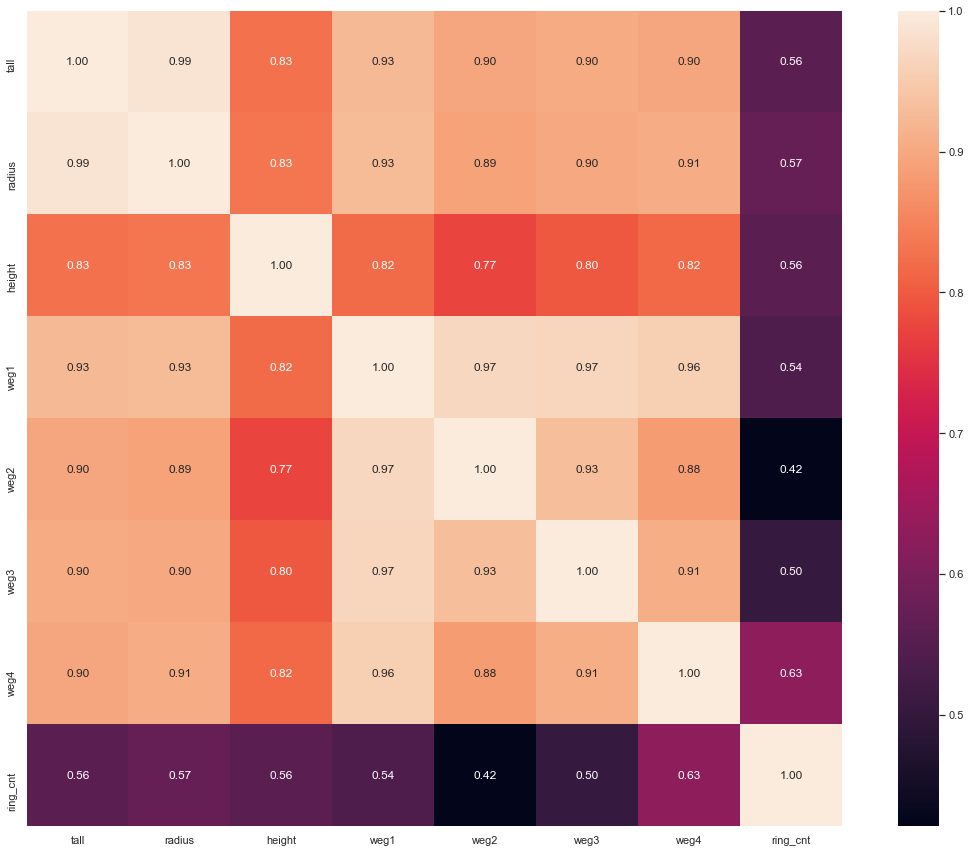

In [9]:
plt.figure(figsize=(20, 15)) #사이즈 정하기
sns.heatmap(df.corr(), annot=True, fmt='.2f',square=True)
plt.show()

# 시각화

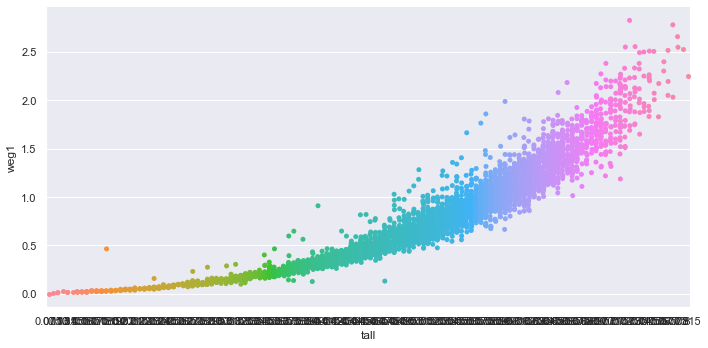

In [10]:
sns.catplot(data=df, x='tall', y='weg1', aspect=2)

## 원핫인코딩
### 성별은 범주형 변수이므로, 수치값으로 변환

In [11]:
from sklearn.preprocessing import OneHotEncoder
data_cat = input_data[["sex"]]
onehot_encoder = OneHotEncoder()
data_cat_onehot = onehot_encoder.fit_transform(data_cat)
print(onehot_encoder.categories)

auto


In [12]:
input_data = input_data.drop("sex", axis=1)

In [13]:
data = np.c_[data_cat_onehot.toarray(), input_data, target_data] # 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

In [14]:
data

array([[ 0.    ,  0.    ,  1.    , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.0485,  0.07  ,  7.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.2875,  0.308 ,  9.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.3765,  0.495 , 12.    ]])

In [15]:
data = pd.DataFrame(data, columns=['sex_F', 'sex_I', 'sex_M', 'sex_''tall', 'radius', 'height', 'weg1', 'weg2', 'weg3', 'weg4', 'ring_cnt'])

In [16]:
data

,sex_F,sex_I,sex_M,sex_tall,radius,height,weg1,weg2,weg3,weg4,ring_cnt
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,1.0,0.0,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,0.0,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,0.0,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,1.0,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


# Linear Regression

In [17]:
target_data = data[["ring_cnt"]]
input_data = data.drop("ring_cnt", axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

In [19]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [20]:
print('training set accuracy: ', model1.score(x_train, y_train)) 

training set accuracy:  0.5470334210800498


In [21]:
prediction = model1.predict(x_test)
prediction

array([[ 8.47631738],
       [ 9.31254616],
       [10.16629357],
       ...,
       [ 6.65220384],
       [ 8.3306062 ],
       [10.95298172]])

In [22]:
y_test

,ring_cnt
1466,8.0
3207,15.0
2593,9.0
493,15.0
3943,14.0
...,...
2271,14.0
3655,9.0
2004,7.0
3814,6.0


# Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

print('training set accuracy: ', model2.score(x_train, y_train)) # 과적합

training set accuracy:  1.0


In [24]:
prediction = model2.predict(x_test)
prediction

array([ 7.,  9., 12., ...,  6.,  7., 10.])

In [25]:
y_test

,ring_cnt
1466,8.0
3207,15.0
2593,9.0
493,15.0
3943,14.0
...,...
2271,14.0
3655,9.0
2004,7.0
3814,6.0


In [26]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

print('training set accuracy: ', model3.score(x_train, y_train))

<ipython-input-26-fbb6fe770444>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train, y_train)


training set accuracy:  0.937373746717027


In [27]:
from sklearn.svm import SVR
model4 = SVR() # 초기화
model4.fit(x_train, y_train)
print('training set accuracy: ', model4.score(x_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


training set accuracy:  0.5114529191171462


In [28]:
from sklearn.metrics import mean_squared_error
some_predicted = model4.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test, some_predicted)) # 실제 y값, 예측 y값
print('평균제곱근오차', mse)

평균제곱근오차 2.364600577664188


# cross-validation

In [29]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(model4, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.2576901  2.28902133 2.34884054 2.42047872 2.27340305 2.29050258
 2.14121568 2.24122323 2.30965581 2.12352973]
2.269556077629797


In [30]:
from sklearn.model_selection import KFold, cross_val_score
d = KFold(n_splits=10, shuffle=True)
score = cross_val_score(model1, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.21414403 2.16235954 2.18371512 2.11661078 2.05585406 2.23706255
 2.1605396  2.0691592  2.50859804 2.39961733]
2.210766025634211


In [31]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(model2, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.94243007 3.09034614 3.13683167 2.7793669  3.21703004 2.93551101
 2.7888191  3.07031896 2.92061227 3.15240383]
3.0033669982891875


In [32]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(model3, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.1932719  2.30521751 2.30145476 2.14547331 2.05189847 2.20044895
 2.06768883 2.22448485 2.15175858 2.16133274]
2.1803029905139133


In [33]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(model4, input_data, target_data.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
score = np.sqrt(-score)
print(score)
print(score.mean())

[2.39107395 2.35743161 2.35536109 2.06752761 2.2772769  2.35580394
 2.34962582 2.22269953 1.97865874 2.31875785]
2.2674217025724195


##### 이때 난 model1,2,3,4이런식으로 했기에 저기서 바꿀때도 D_model, R_model 이런식이 아니라 저걸로 해야됨